2019-10-11 17:41:49 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-10-11 17:41:49 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-10-11 17:41:49 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2019-10-11 17:41:49 INFO: Setting time scale factor to 10.
2019-10-11 17:41:49 INFO: Setting machine time step to 100 micro-seconds.
2019-10-11 17:41:49 INFO: Simulating for 1 100ms timesteps using a hardware timestep of 10000us
2019-10-11 17:41:49 INFO: Starting execution process


Detected PyNN version 0.9.4 and Neo version 0.6.1
['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


2019-10-11 17:41:53 INFO: Time 0:00:03.683668 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-10-11 17:42:02 INFO: Time 0:00:09.485295 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-10-11 17:42:09 INFO: Time 0:00:06.449401 taken by PartitionAndPlacePartitioner
Created spalloc job 5178847
2019-10-11 17:42:09 INFO: Created spalloc job 5178847
Waiting for board power commands to complete.
2019-10-11 17:42:09 INFO: Waiting for board power commands to complete.
2019-10-11 17:42:14 INFO: Time 0:00:05.049722 taken by SpallocAllocator
2019-10-11 17:42:14 INFO: Creating transceiver for 10.11.195.81
2019-10-11 17:42:14 INFO: Working out if machine is booted
2019-10-11 17:42:18 INFO: Attempting to

<IPython.core.display.Javascript object>


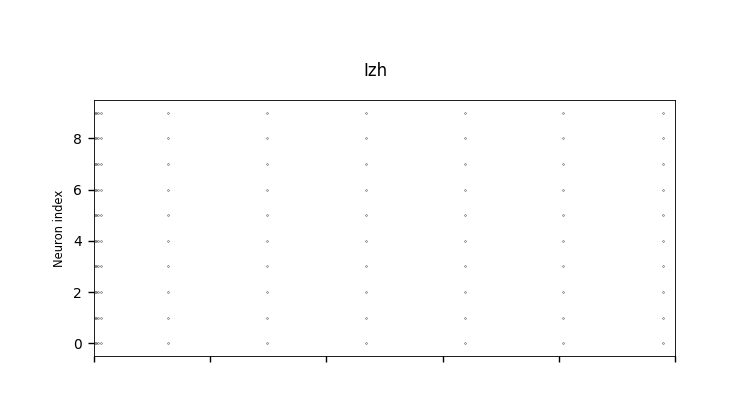

In [1]:
import spynnaker8 as p
import time
from matplotlib import pyplot as plt
import numpy as np
import spynnaker8.spynnaker_plotting as pl
import spynnaker8.utilities.neo_convertor as convert
from pyNN.utility.plotting import Figure, Panel

start_time = time.time()

#time of simulation
TotalDuration = 100.0

#parameters
a = 0.03
b = -2
c = -50
d = 100

#Constant current
current_pulse = 250
current_pulse = current_pulse+100

#Number of output neurons 
NumYCells = 10

#Model used
model_Izh = p.Izhikevich

'''Starting the Spinnaker Simulation'''
p.setup(timestep=0.1,min_delay=1.0,max_delay=14.0)
#number of neurons per core
p.set_number_of_neurons_per_core(p.SpikeSourceArray,50)

#setting up the parameters for Izh
cell_params = {'a':a, 'b':b, 'c':c, 'd':d,'i_offset':current_pulse}
y_Izh_population = p.Population(NumYCells, model_Izh(**cell_params),label='Izh_neuron_input')

#recording the spikes and voltage
y_Izh_population.record(["spikes","v"])

#running simulation for total duration
p.run(TotalDuration)

#extracting the membrane potential data in millivolts
y_izh_data = y_Izh_population.get_data(["v","spikes"])

Figure(
    #raster plot of the presynaptic neuron spike times
    Panel(y_izh_data.segments[0].spiketrains,yticks=True,markersize=0.4, xlim=(0,TotalDuration)),
    title="Izh").save("Izh_output.png")
plt.show()

#release spinnaker machine
p.end()

2019-10-11 20:37:09 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-10-11 20:37:09 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-10-11 20:37:09 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2019-10-11 20:37:09 INFO: Setting time scale factor to 10.
2019-10-11 20:37:09 INFO: Setting machine time step to 100 micro-seconds.
2019-10-11 20:37:09 INFO: Simulating for 1 100ms timesteps using a hardware timestep of 10000us
2019-10-11 20:37:09 INFO: Starting execution process


Detected PyNN version 0.9.4 and Neo version 0.6.1
['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


2019-10-11 20:37:13 INFO: Time 0:00:03.485567 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-10-11 20:37:22 INFO: Time 0:00:08.943786 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-10-11 20:37:28 INFO: Time 0:00:05.738692 taken by PartitionAndPlacePartitioner
Created spalloc job 5178863
2019-10-11 20:37:28 INFO: Created spalloc job 5178863
Waiting for board power commands to complete.
2019-10-11 20:37:28 INFO: Waiting for board power commands to complete.
2019-10-11 20:37:33 INFO: Time 0:00:05.049411 taken by SpallocAllocator
2019-10-11 20:37:33 INFO: Creating transceiver for 10.11.193.145
2019-10-11 20:37:33 INFO: Working out if machine is booted
2019-10-11 20:37:37 INFO: Attempting t

<IPython.core.display.Javascript object>


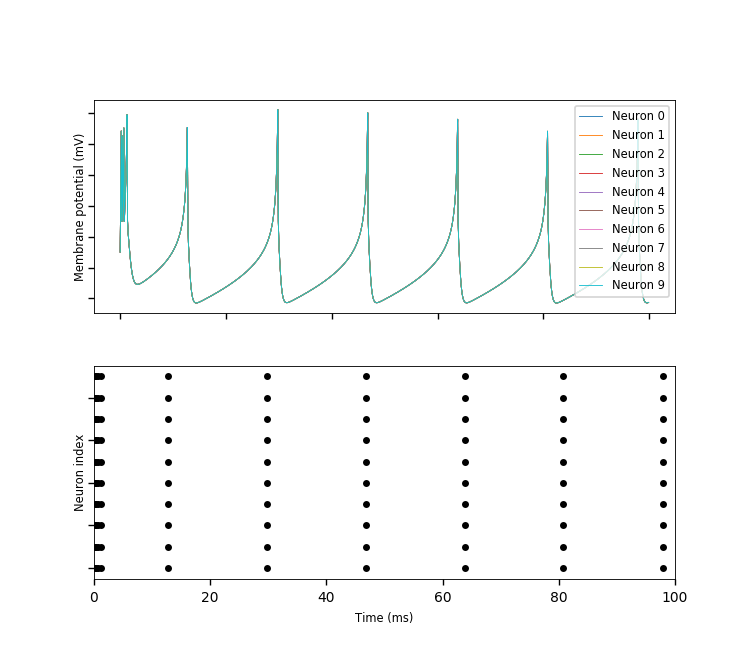

In [1]:
import spynnaker8 as p
import time
from matplotlib import pyplot as plt
import numpy as np
import spynnaker8.spynnaker_plotting as pl
import spynnaker8.utilities.neo_convertor as convert
from pyNN.utility.plotting import Figure, Panel

start_time = time.time()

#time of simulation
TotalDuration = 100.0

#parameters
a = 0.03
b = -2
c = -50
d = 100

#Constant current
current_pulse = 250
current_pulse = current_pulse+100

#Number of output neurons 
NumYCells = 10

#Model used
model_Izh = p.Izhikevich

'''Starting the Spinnaker Simulation'''
p.setup(timestep=0.1,min_delay=1.0,max_delay=14.0)
#number of neurons per core
p.set_number_of_neurons_per_core(p.SpikeSourceArray,50)

#setting up the parameters for Izh
cell_params = {'a':a, 'b':b, 'c':c, 'd':d,'i_offset':current_pulse}
y_Izh_population = p.Population(NumYCells, model_Izh(**cell_params),label='Izh_neuron_input')

#recording the spikes and voltage
y_Izh_population.record(["spikes","v"])

#running simulation for total duration
p.run(TotalDuration)

#extracting the membrane potential data in millivolts
# y_izh_data = y_Izh_population.get_data(["v","spikes"])
data = y_Izh_population.get_data().segments[0]
vm = data.filter(name="v")[0]
Figure(
    Panel(vm, ylabel="Membrane potential (mV)"),
    Panel(data.spiketrains, xlabel="Time (ms)", xticks=True)
).save("simulation_results.png")

# Figure(
#     #raster plot of the presynaptic neuron spike times
#     Panel(y_izh_data.segments[0].spiketrains,yticks=True,markersize=0.4, xlim=(0,TotalDuration)),
#     title="Izh").save("Izh_output.png")
# plt.show()

#release spinnaker machine
p.end()